In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE=224
BATCH_SIZE=32
CHANNEL=3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Disease_img",
    shuffle=True,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 2738 files belonging to 5 classes.


In [4]:
class_names = dataset.class_names
print("Class names:", class_names)

Class names: ['Brown_spot', 'Healthy', 'RedRot', 'RedRust', 'Yellow_Leaf']


In [5]:
len(dataset)

86

In [6]:
for image_batch, label_batch in dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch:", label_batch.numpy())

Image batch shape: (32, 224, 224, 3)
Label batch: [0 1 1 1 4 2 4 3 1 2 3 2 2 0 0 3 3 3 0 1 3 0 0 2 3 1 4 3 0 2 2 1]


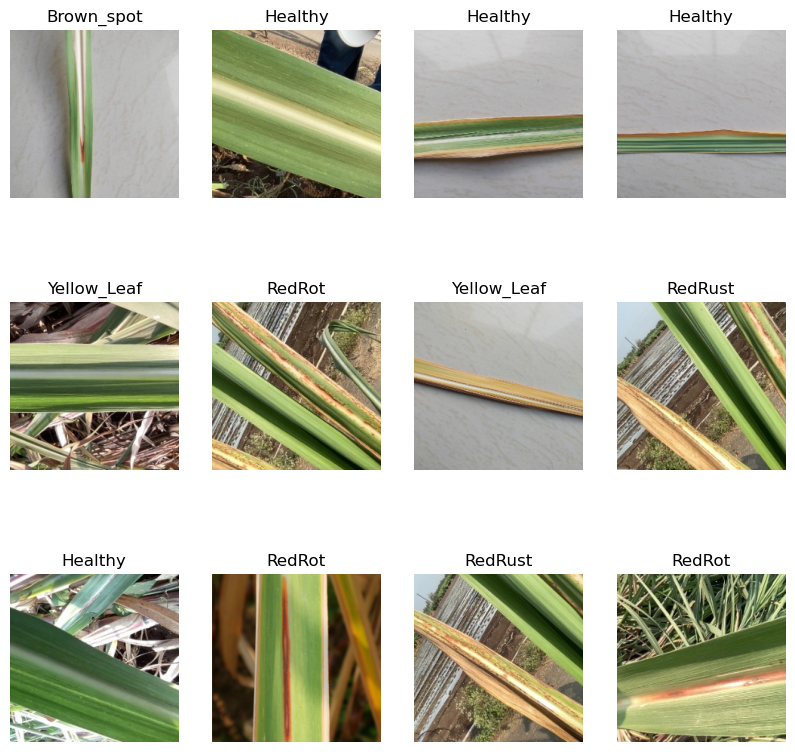

In [7]:
plt.figure(figsize=(10,10))
for image_batch,labela_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [8]:
train_size=0.8
len(dataset)*train_size

68.8

In [9]:
train_ds=dataset.take(68)
len(train_ds)

68

In [10]:
test_ds=dataset.skip(68)
len(test_ds)

18

In [11]:
val_size=0.1
len(dataset)*val_size

8.6

In [12]:
val_ds=test_ds.take(8)
len(val_ds)

8

In [13]:
test_ds=test_ds.skip(8)
len(test_ds)

10

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds , val_ds , test_ds=get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

68

In [17]:
len(val_ds)

8

In [18]:
len(test_ds)

10

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [21]:
# Model setup
input_shape = (IMG_SIZE, IMG_SIZE, CHANNEL)
n_classes = len(class_names)

model = models.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE, input_shape=input_shape),  # Set input_shape here
    layers.Rescaling(1.0 / 255),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation="softmax"),
])


C:\Users\saqla\anaconda2\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,589 (670.27 KB)

 Trainable params: 171,589 (670.27 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    epochs=40,
    verbose=1,
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 83s 966ms/step - accuracy: 0.3096 - loss: 1.4376 - val_accuracy: 0.5273 - val_loss: 0.8349
Epoch 2/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 55s 811ms/step - accuracy: 0.5283 - loss: 0.9187 - val_accuracy: 0.5000 - val_loss: 0.9079
Epoch 3/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 50s 737ms/step - accuracy: 0.6562 - loss: 0.7096 - val_accuracy: 0.5664 - val_loss: 0.7931
Epoch 4/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 51s 753ms/step - accuracy: 0.7550 - loss: 0.5254 - val_accuracy: 0.7773 - val_loss: 0.4916
Epoch 5/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 50s 740ms/step - accuracy: 0.7752 - loss: 0.5233 - val_accuracy: 0.7305 - val_loss: 0.5362
Epoch 6/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 51s 749ms/step - accuracy: 0.8272 - loss: 0.4067 - val_accuracy: 0.8281 - val_loss: 0.3870
Epoch 7/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 49s 724ms/step - accuracy: 0.8787 - loss: 0.3162 - val_accuracy: 0.8672 - val_loss: 0.2583
Epoch 8/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 48s 713ms/step - accuracy: 0.9150 - loss: 0.2018 - val_accu

In [25]:
scores=model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - accuracy: 1.0000 - loss: 0.0071


In [26]:
scores

[0.006931892596185207, 1.0]

In [27]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 68}

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


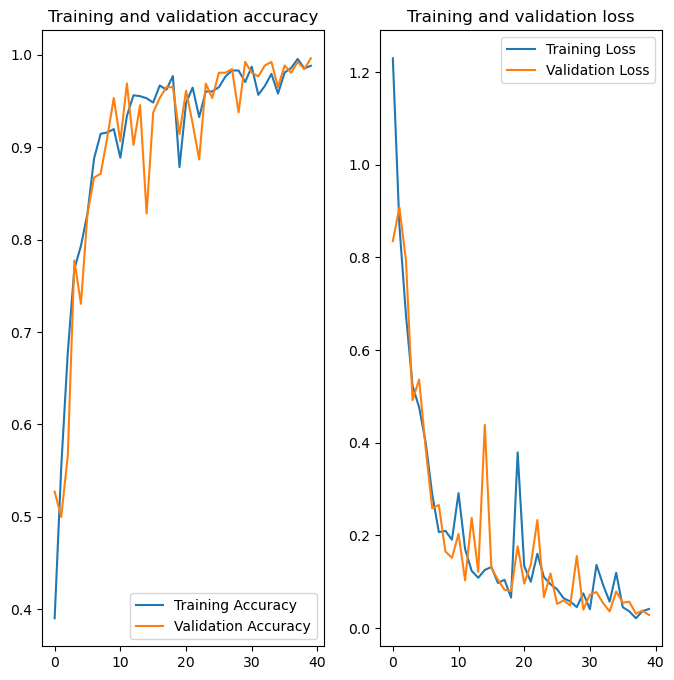

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(40), acc, label='Training Accuracy')
plt.plot(range(40), val_acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Training and validation accuracy")

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(40), loss, label='Training Loss')
plt.plot(range(40), val_loss, label='Validation Loss')
plt.legend(loc="upper right")
plt.title("Training and validation loss")

plt.show()


first image to predict
actual label Yellow_Leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
predicted label: Yellow_Leaf


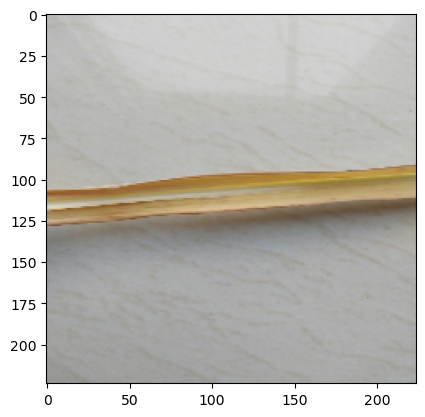

In [31]:
import numpy as np 
for images_batch , labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label" , class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:" , class_names[np.argmax(batch_prediction[0])] )

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # use 'img' instead of 'image[i]'
    img_array = tf.expand_dims(img_array, 0)  # add a batch dimension

    batch_prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(batch_prediction[0])]
    confidence = 100 * np.max(batch_prediction[0])
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


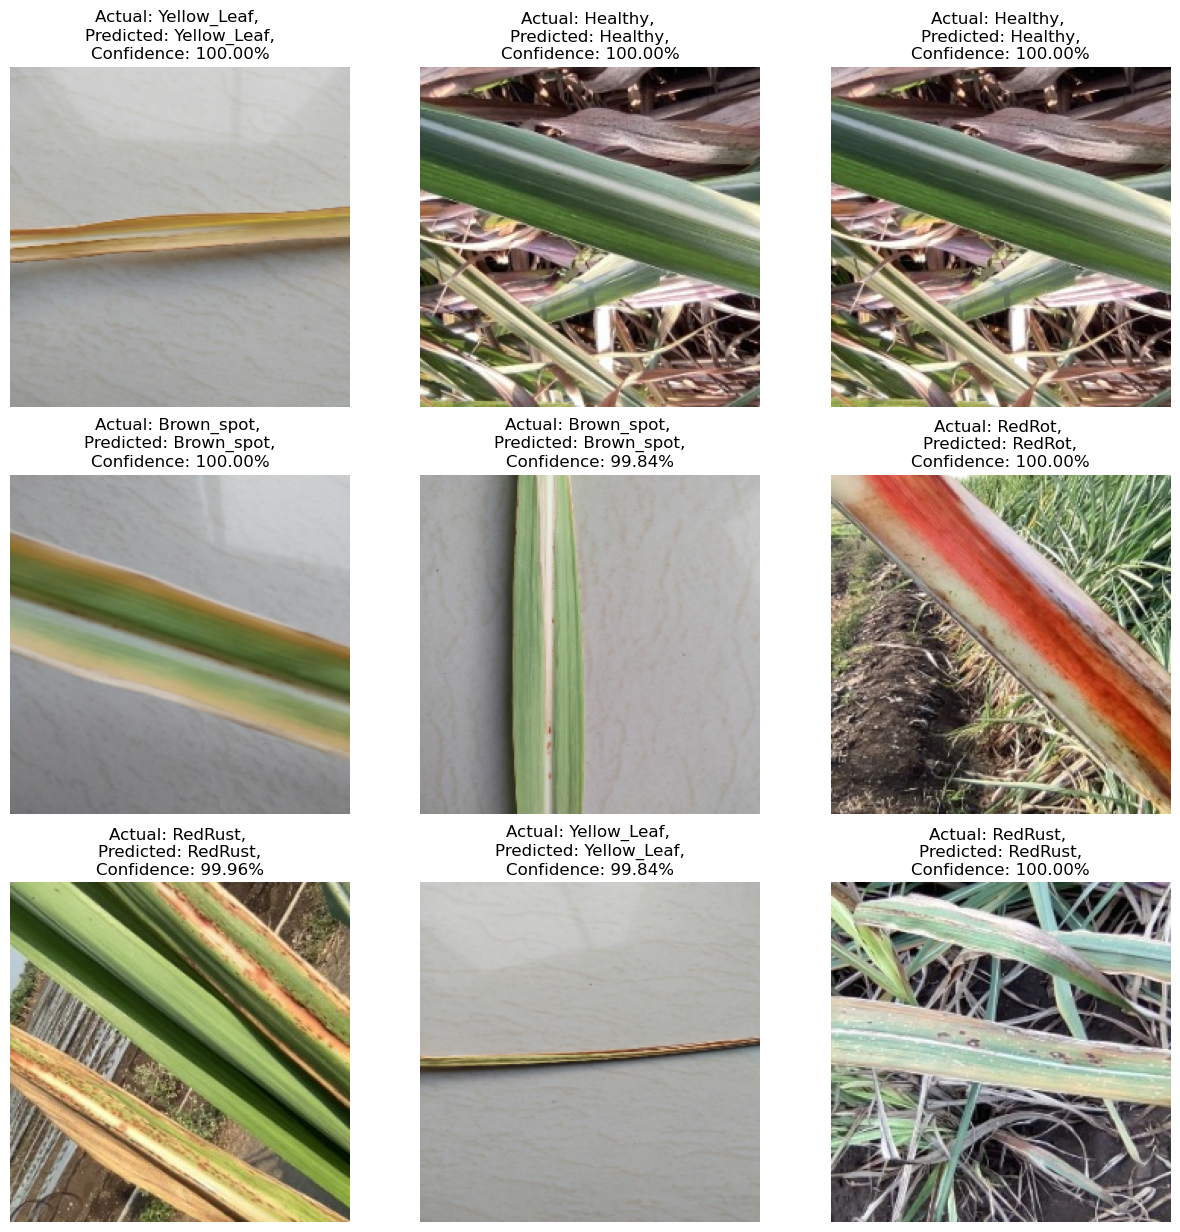

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class},\nConfidence: {confidence:.2f}%")
        plt.axis("off")

plt.show()


In [34]:
model_version = 1
model.export(f"../models/{model_version}")


INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


Saved artifact at '../models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2886869366064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2886869366240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2886869367648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2886869368000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2886869367472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2886869368352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2887160365296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2887160366352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2887160365824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2887160367232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2887160365648: TensorSpec(shape=(), dty

In [35]:
import tensorflow as tf

model_version = 1
model = tf.saved_model.load(f"../models/{model_version}")


In [36]:
# Save model
model.save('model.h5')

# Load model
from tensorflow.keras.models import load_model
model = load_model('model.h5')


AttributeError: '_UserObject' object has no attribute 'save'

In [37]:
print(type(model))


<class 'tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject'>


In [38]:
# Check if there is a 'get_model' method or similar
if hasattr(model, 'get_model'):
    model = model.get_model()

print(type(model))  # Check the type again


<class 'tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject'>


In [39]:
import tensorflow as tf

# Save the model in the SavedModel format
tf.saved_model.save(model, 'saved_model_directory')


INFO:tensorflow:Assets written to: saved_model_directory\assets


INFO:tensorflow:Assets written to: saved_model_directory\assets


In [2]:
import tensorflow as tf
loaded_model = tf.saved_model.load('saved_model_directory')

